In [2]:
from tensorflow.examples.tutorials.mnist import input_data 
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist.train.labels[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 7
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 4
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 5


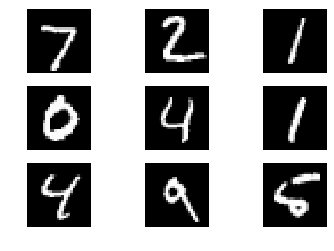

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
for i in range(9):
    im=mnist.test.images[i].reshape(28,28)
    plt.subplot(3,3,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis("off")
    print(mnist.test.labels[i],np.argmax(mnist.test.labels[i]))

In [5]:
import tensorflow as tf
# x是特征值
x = tf.placeholder(tf.float32, [None, 784])
# w表示每一个特征值（像素点）会影响结果的权重
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b
# 是图片实际对应的值
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
#取得y得最大概率对应的数组索引来和y_的数组索引对比，如果索引相同，则表示预测正确
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
init = tf.global_variables_initializer()
saver = tf.train.Saver()
n_epochs = 400
batch_size = 300
with tf.Session() as sess: 
    init.run()
    # mnist.train 训练数据
    for i in range(n_epochs):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        print("epoch:",i,"accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
    save_path = saver.save(sess, "./my_model_final.ckpt")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

epoch: 0 accuracy: 0.2662
epoch: 1 accuracy: 0.362
epoch: 2 accuracy: 0.5947
epoch: 3 accuracy: 0.6712
epoch: 4 accuracy: 0.706
epoch: 5 accuracy: 0.6982
epoch: 6 accuracy: 0.7553
epoch: 7 accuracy: 0.829
epoch: 8 accuracy: 0.7624
epoch: 9 accuracy: 0.813
epoch: 10 accuracy: 0.8376
epoch: 11 accuracy: 0.8322
epoch: 12 accuracy: 0.8509
epoch: 13 accuracy: 0.8461
epoch: 14 accuracy: 0.8613
epoch: 15 accuracy: 0.8453
epoch: 16 accuracy: 0.8506
epoch: 17 accuracy: 0.8392
epoch: 18 accuracy: 0.8653
epoch: 19 accuracy: 0.8534
epoch: 20 accuracy: 0.865
epoch: 21 accuracy: 0.8658
epoch: 22 accuracy: 0.8673
epoch: 23 accuracy: 0.872
epoch: 24 accuracy: 0.8676
epoch: 25 accuracy: 0.8704
epoch: 26 accuracy: 0.8667
epoch: 27 accuracy: 0.87

epoch: 295 accuracy: 0.912
epoch: 296 accuracy: 0.9112
epoch: 297 accuracy: 0.9125
epoch: 298 accuracy: 0.9128
epoch: 299 accuracy: 0.9117
epoch: 300 accuracy: 0.9112
epoch: 301 accuracy: 0.913
epoch: 302 accuracy: 0.9122
epoch: 303 accuracy: 0.9107
epoch: 304 accuracy: 0.9121
epoch: 305 accuracy: 0.9108
epoch: 306 accuracy: 0.911
epoch: 307 accuracy: 0.9132
epoch: 308 accuracy: 0.9135
epoch: 309 accuracy: 0.913
epoch: 310 accuracy: 0.9119
epoch: 311 accuracy: 0.9126
epoch: 312 accuracy: 0.913
epoch: 313 accuracy: 0.9119
epoch: 314 accuracy: 0.9135
epoch: 315 accuracy: 0.913
epoch: 316 accuracy: 0.913
epoch: 317 accuracy: 0.9134
epoch: 318 accuracy: 0.9151
epoch: 319 accuracy: 0.9146
epoch: 320 accuracy: 0.9156
epoch: 321 accuracy: 0.916
epoch: 322 accuracy: 0.9148
epoch: 323 accuracy: 0.914
epoch: 324 accuracy: 0.915
epoch: 325 accuracy: 0.9142
epoch: 326 accuracy: 0.9132
epoch: 327 accuracy: 0.9136
epoch: 328 accuracy: 0.914
epoch: 329 accuracy: 0.9145
epoch: 330 accuracy: 0.9149
epo

In [6]:
with tf.Session() as sess: 
    saver.restore(sess, "./my_model_final.ckpt")
    print(np.argmax(y.eval(feed_dict={x:mnist.test.images[0:9] }),1))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
[7 2 1 0 4 1 4 9 6]


In [7]:
np.argmax(mnist.test.labels[0:9],1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5])